# Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# Reading in and checking

In [2]:
df = pd.read_csv('./data/train_1.csv')

In [3]:
df.shape

(145063, 551)

In [4]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


# Kinds of data in the frame
There are apparently three sources:

In [5]:
df[df['Page'].str.contains('_all-access_spider')].shape[0]

34913

In [6]:
df[df['Page'].str.contains('_desktop_all-agents')].shape[0]

34809

In [7]:
df[df['Page'].str.contains('_all-access_all-agents')].shape[0]

39402

In [8]:
en_df = df[df['Page'].str.contains('en.wikipedia.org_all-access_all-agents')]

In [9]:
en_df.shape

(9419, 551)

In [10]:
turtles = en_df[en_df['Page'].str.contains('turtle')]

In [11]:
turtles_name = turtles.iloc[:,0].values[0]
turtles = turtles.iloc[:, 1:]

In [12]:
index_of_thing = turtles.columns

In [13]:
values = turtles.values

In [14]:
new = pd.DataFrame({'daily_views':values[0]}, index=index_of_thing)

In [15]:
new.index = pd.to_datetime(new.index)

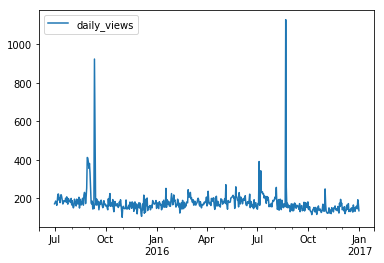

In [16]:
new.plot()

In [17]:
new - new.shift(1)

,daily_views
2015-07-01,NaN
2015-07-02,6.0
2015-07-03,8.0
2015-07-04,-6.0
2015-07-05,-16.0
2015-07-06,24.0
2015-07-07,33.0
2015-07-08,2.0
2015-07-09,-32.0
2015-07-10,12.0


In [18]:
date_index = df.columns[1:]

In [19]:
transposed_column_names = df.iloc[:, 0].values

In [20]:
transposed = pd.DataFrame(df.iloc[:, 1:].T, columns=transposed_column_names, index=date_index)

In [21]:
transposed.head()

,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
transposed = pd.DataFrame(df.iloc[:, 1:].T)

In [23]:
transposed.index = pd.to_datetime(date_index)

In [24]:
transposed.columns = transposed_column_names

In [25]:
transposed.head()

,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
list_of_english_pages = en_df['Page']


In [27]:
transposed_english = transposed[list_of_english_pages]

In [28]:
transposed.head()

,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
transposed_english.columns = transposed_english.columns.map(lambda x: x[:x.find('_en.')])

In [30]:
df[df['Page'].str.contains('!vote')]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
8357,!vote_en.wikipedia.org_desktop_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,...,3.0,1.0,6.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0
32275,!vote_en.wikipedia.org_all-access_spider,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,...,2.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0
37206,!vote_en.wikipedia.org_all-access_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,...,3.0,1.0,6.0,3.0,1.0,1.0,4.0,3.0,1.0,1.0


In [31]:
transposed_english.head()

,!vote,"""Awaken,_My_Love!""","""European_Society_for_Clinical_Investigation""","""Weird_Al""_Yankovic",'Tis_the_Season,.xxx,10_Cloverfield_Lane,13_Hours:_The_Secret_Soldiers_of_Benghazi,1896_Summer_Olympics,1918_flu_pandemic,...,Zgornji_Lehen_na_Pohorju,Zhao_Lin,Zhejiang_Yueju_Troupe,Zheleznogorsk_Airport,Zhu_Qingyuan,Zikanyrops_sparsa,Zillur_Rahman_John,Zitadelle,"Zovashen_(Dzhannatlu),_Ararat",Zurich.minds
2015-07-01,3.0,NaN,NaN,3966.0,34.0,15408.0,NaN,NaN,605.0,1624.0,...,1.0,3.0,NaN,NaN,NaN,1.0,7.0,10.0,NaN,8.0
2015-07-02,4.0,NaN,NaN,27052.0,30.0,17375.0,NaN,53.0,617.0,1577.0,...,1.0,NaN,1.0,5.0,1.0,5.0,9.0,6.0,NaN,5.0
2015-07-03,7.0,NaN,NaN,3867.0,32.0,17334.0,NaN,648.0,552.0,1464.0,...,1.0,2.0,1.0,4.0,2.0,2.0,3.0,4.0,1.0,7.0
2015-07-04,4.0,NaN,NaN,3117.0,33.0,19041.0,NaN,723.0,547.0,1404.0,...,1.0,2.0,1.0,5.0,1.0,2.0,6.0,8.0,1.0,13.0
2015-07-05,4.0,NaN,NaN,3578.0,17.0,18550.0,NaN,760.0,629.0,1521.0,...,1.0,1.0,NaN,7.0,1.0,NaN,4.0,13.0,1.0,8.0


In [32]:
transposed_english['!vote']

2015-07-01     3.0
2015-07-02     4.0
2015-07-03     7.0
2015-07-04     4.0
2015-07-05     4.0
2015-07-06     2.0
2015-07-07     3.0
2015-07-08     7.0
2015-07-09     2.0
2015-07-10     NaN
2015-07-11     3.0
2015-07-12     1.0
2015-07-13     2.0
2015-07-14     2.0
2015-07-15     3.0
2015-07-16     2.0
2015-07-17     1.0
2015-07-18     1.0
2015-07-19     1.0
2015-07-20     NaN
2015-07-21     6.0
2015-07-22     8.0
2015-07-23     5.0
2015-07-24     1.0
2015-07-25     2.0
2015-07-26     1.0
2015-07-27     2.0
2015-07-28    10.0
2015-07-29     4.0
2015-07-30     6.0
              ... 
2016-12-02     3.0
2016-12-03     3.0
2016-12-04     2.0
2016-12-05     2.0
2016-12-06     2.0
2016-12-07     1.0
2016-12-08     2.0
2016-12-09     NaN
2016-12-10     2.0
2016-12-11     2.0
2016-12-12     3.0
2016-12-13     1.0
2016-12-14     2.0
2016-12-15     5.0
2016-12-16     3.0
2016-12-17     3.0
2016-12-18     2.0
2016-12-19     1.0
2016-12-20     3.0
2016-12-21     2.0
2016-12-22     3.0
2016-12-23  

In [33]:
transposed_english_copy = transposed_english.copy()

for col in transposed_english.columns:
    transposed_english_copy[col+"_delta"] = transposed_english[col] - transposed_english[col].shift(1)

Text(0.5,1,'Brand_New_(band)')

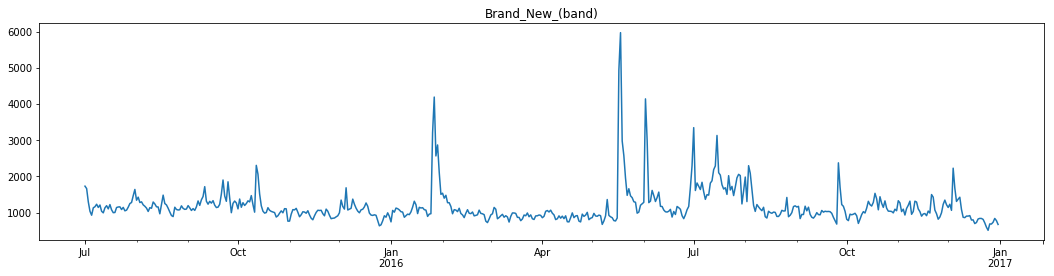

In [58]:
this_choice = np.random.choice(transposed_english.columns)

plt.figure(figsize = (18,4))
transposed_english.loc[:,this_choice].plot()
plt.title(this_choice)

In [59]:
transposed_english.head()

,!vote,"""Awaken,_My_Love!""","""European_Society_for_Clinical_Investigation""","""Weird_Al""_Yankovic",'Tis_the_Season,.xxx,10_Cloverfield_Lane,13_Hours:_The_Secret_Soldiers_of_Benghazi,1896_Summer_Olympics,1918_flu_pandemic,...,Zgornji_Lehen_na_Pohorju,Zhao_Lin,Zhejiang_Yueju_Troupe,Zheleznogorsk_Airport,Zhu_Qingyuan,Zikanyrops_sparsa,Zillur_Rahman_John,Zitadelle,"Zovashen_(Dzhannatlu),_Ararat",Zurich.minds
2015-07-01,3.0,NaN,NaN,3966.0,34.0,15408.0,NaN,NaN,605.0,1624.0,...,1.0,3.0,NaN,NaN,NaN,1.0,7.0,10.0,NaN,8.0
2015-07-02,4.0,NaN,NaN,27052.0,30.0,17375.0,NaN,53.0,617.0,1577.0,...,1.0,NaN,1.0,5.0,1.0,5.0,9.0,6.0,NaN,5.0
2015-07-03,7.0,NaN,NaN,3867.0,32.0,17334.0,NaN,648.0,552.0,1464.0,...,1.0,2.0,1.0,4.0,2.0,2.0,3.0,4.0,1.0,7.0
2015-07-04,4.0,NaN,NaN,3117.0,33.0,19041.0,NaN,723.0,547.0,1404.0,...,1.0,2.0,1.0,5.0,1.0,2.0,6.0,8.0,1.0,13.0
2015-07-05,4.0,NaN,NaN,3578.0,17.0,18550.0,NaN,760.0,629.0,1521.0,...,1.0,1.0,NaN,7.0,1.0,NaN,4.0,13.0,1.0,8.0


In [60]:
df = transposed_english

In [75]:
df.fillna(0, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [86]:
these_columns = ['!vote', '"Awaken,_My_Love!"']#,'"European_Society_for_Clinical_Investigation"']#,'"Weird_Al"_Yankovic']

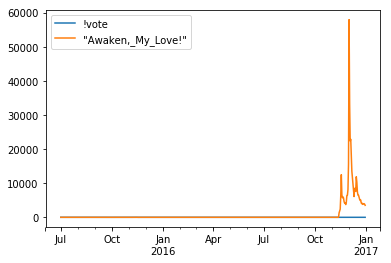

In [87]:
df[these_columns].plot()
plt.legend()